In [2]:
import pandas as pd
import numpy as np
import sqlite3


In [66]:
from matplotlib import pyplot as plt

In [7]:
conn = sqlite3.connect(r"C:\Users\jglasskatz\MASControl3\mc3_db\MC2020_results.db")
df = pd.read_sql_query("select * from sim_hourly_wb where BldgLoc  = 'CZ01 and BldgHVAC = cDXEH And BldgVint = 2015';", conn)
df.head()

TechID SizingID BldgType BldgVint BldgLoc BldgHVAC tstat enduse  daynum  \
0     IP     Save      OfS     2020    CZ09    cAVVE     0     20       1   
1     IP     Save      OfS     2020    CZ09    cAVVE     0     20       2   
2     IP     Save      OfS     2020    CZ09    cAVVE     0     20       3   
3     IP     Save      OfS     2020    CZ09    cAVVE     0     20       4   
4     IP     Save      OfS     2020    CZ09    cAVVE     0     20       5   

    hr01         ...             hr16    hr17    hr18   hr19   hr20   hr21  \
0  2.472         ...            2.730   2.711   2.606  2.568  2.546  2.524   
1  2.673         ...           20.265  20.781  18.794  6.234  3.357  3.049   
2  2.472         ...           12.124  13.343  15.397  2.568  2.546  2.524   
3  2.472         ...            2.730   2.711   2.606  2.568  2.546  2.524   
4  2.673         ...           23.151  23.115  16.667  6.234  3.357  3.049   

    hr22   hr23   hr24              lastmod  
0  2.501  2.493  2.482  2019-05-21 13:43:29  
1  2.883  2.783  2.727  2019-05-21 13:43:29  
2  2.501  2.493  2.482  2019-05-21 13:43:29  
3  2.501  2.493  2.482  2019-05-21 13:43:29  
4  2.883  2.783  2.727  2019-05-21 13:43:29  

[5 rows x 34 columns]

In [37]:
dfOfs = df.loc[(df['BldgType']=='OfS') & (df['BldgVint']=='2015')&(df['BldgHVAC']=='cDXEH')].copy()
dfOfl = df.loc[(df['BldgType']=='OfL')& (df['BldgVint']=='2015')&(df['BldgHVAC']=='cDXEH')].copy()

In [30]:
dfOfs.TechID.value_counts()

NonResLtgRefMsr-EX     365
IP                     365
NonResLtgRefMsr-CFL    365
NonResLtgRefMsr-HB     365
NonResLtgRefMsr-LF     365
Name: TechID, dtype: int64

In [40]:
dfOfs['season'] = 'winter'
dfOfs.loc[dfOfs['daynum'].isin(range(60,151)), 'season'] = 'spring'
dfOfs.loc[dfOfs['daynum'].isin(range(151,243)), 'season'] = 'summer'
dfOfs.loc[dfOfs['daynum'].isin(range(242,334)), 'season'] = 'fall'

In [41]:
dfOfs.season.value_counts()

fall      460
winter    455
spring    455
summer    455
Name: season, dtype: int64

In [48]:
dfos = dfOfs.iloc[:,9:]
dfos.drop(['lastmod'], axis=1, inplace=True)

In [57]:
dfag = dfos.groupby('season', as_index = False).mean().drop('daynum', axis=1)

In [68]:
dfn = pd.melt(dfag, id_vars=['season'])
dfn = dfn.pivot(index = 'variable', columns = 'season', values = 'value')


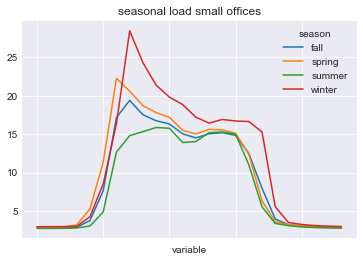

In [100]:
dfn.plot()
plt.title('seasonal load small offices')
plt.show()

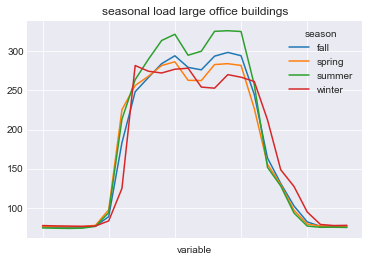

In [99]:
dfOfl['season'] = 'winter'
dfOfl.loc[dfOfl['daynum'].isin(range(60,151)), 'season'] = 'spring'
dfOfl.loc[dfOfl['daynum'].isin(range(151,243)), 'season'] = 'summer'
dfOfl.loc[dfOfl['daynum'].isin(range(242,334)), 'season'] = 'fall'
dfol = dfOfl.loc[dfOfl['TechID']!='IP']
dfol = dfOfl.iloc[:,8:]
dfol.drop(['lastmod'], axis=1, inplace=True)
dfagl = dfol.groupby('season', as_index = False).mean().drop('daynum', axis=1)
dfnl = pd.melt(dfagl, id_vars=['season'])
dfnl = dfnl.pivot(index = 'variable', columns = 'season', values = 'value')
dfnl.plot()
plt.title('seasonal load large office buildings')
plt.show()

In [101]:
#IT looks like similar assumptions to OPEN EI are going on with the electric heating in the winter for small buildings?
#Also I believe this is coming from one building (4 building types actually but all the same type of building)
#In addition, is this lighting load or overall load? I suspect overall.
#Climate zone is 1 for this need to figure out exactly what that is

In [80]:
dfd = pd.melt(dfos, id_vars=['season', 'daynum'])
dfd = dfd.pivot_table(index = 'variable', columns = 'daynum', values = 'value')

In [105]:
dfdl = pd.melt(dfol, id_vars=['season', 'daynum'])
dfdl = dfdl.pivot_table(index = 'variable', columns = 'daynum', values = 'value')

Text(0, 0.5, 'Load')

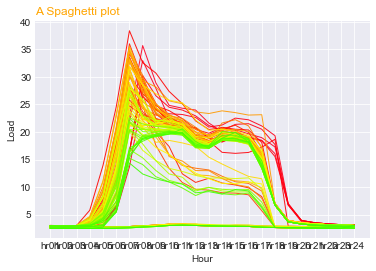

In [90]:
# style
plt.style.use('seaborn-darkgrid')
 
# create a color palette
cm = plt.get_cmap('gist_rainbow')
 
# multiple line plot
num=0
start = 60
end = 151
for column in dfd.iloc[:,start:end]:
    num+=1
    plt.plot( dfd[column], marker='', color=cm(num), linewidth=1, alpha=0.9, label=column)


 
# Add titles
plt.title("Spring Small Offices", loc='left', fontsize=12, fontweight=0, color='orange')
plt.xlabel("Hour")
plt.ylabel("Load")


Text(0, 0.5, 'Load')

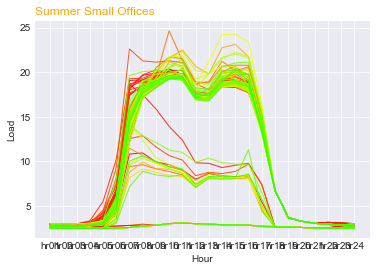

In [104]:
# style
plt.style.use('seaborn-darkgrid')
 
# create a color palette
cm = plt.get_cmap('gist_rainbow')
 
# multiple line plot
num=0
start = 151
end = 243
for column in dfd.iloc[:,start:end]:
    num+=1
    plt.plot( dfd[column], marker='', color=cm(num), linewidth=1, alpha=0.9, label=column)


 
# Add titles
plt.title("Summer Small Offices", loc='left', fontsize=12, fontweight=0, color='orange')
plt.xlabel("Hour")
plt.ylabel("Load")

In [106]:
# style
plt.style.use('seaborn-darkgrid')
 
# create a color palette
cm = plt.get_cmap('gist_rainbow')
 
# multiple line plot
num=0
start = 60
end = 151
for column in dfdl.iloc[:,start:end]:
    num+=1
    plt.plot( dfdl[column], marker='', color=cm(num), linewidth=1, alpha=0.9, label=column)


 
# Add titles
plt.title("Spring Large Offices", loc='left', fontsize=12, fontweight=0, color='orange')
plt.xlabel("Hour")
plt.ylabel("Load")


Text(0, 0.5, 'Load')

In [136]:
fig, axs = plt.subplots(2, 2)
num=0
start = 60
end = 151
for column in dfdl.iloc[:,start:end]:
    num+=1
    axs[0, 0].plot( dfdl[column], marker='', color=cm(num), linewidth=1, alpha=0.9, label=column)
axs[0, 0].set_title('Spring large offices')
start = 152
end = 243
for column in dfdl.iloc[:,start:end]:
    num+=1
    axs[0, 1].plot( dfdl[column], marker='', color=cm(num), linewidth=1, alpha=0.9, label=column)
axs[0, 1].set_title('Summer large Offices')
num = 0
start = 244
end = 334
for column in dfdl.iloc[:,start:end]:
    num+=1
    axs[1, 0].plot( dfdl[column], marker='', color=cm(num), linewidth=1, alpha=0.9, label=column)
axs[1, 0].set_title('Fall large Offices')

start = 335
end = 60
for column in dfdl.iloc[:,start:]:
    num+=1
    axs[1, 1].plot( dfdl[column], marker='', color=cm(num), linewidth=1, alpha=0.9, label=column)
for column in dfdl.iloc[:,:end]:
    num+=1
    axs[1, 1].plot( dfdl[column], marker='', color=cm(num), linewidth=1, alpha=0.9, label=column)
axs[1, 1].set_title('Winter Large Offices')

for ax in axs.flat:
    ax.set(xlabel='x-label', ylabel='y-label')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()

In [135]:
fig, axs = plt.subplots(2, 2)
num=0
start = 60
end = 151
for column in dfd.iloc[:,start:end]:
    num+=1
    axs[0, 0].plot( dfd[column], marker='', color=cm(num), linewidth=1, alpha=0.9, label=column)
axs[0, 0].set_title('Spring small offices')
start = 152
end = 243
for column in dfd.iloc[:,start:end]:
    num+=1
    axs[0, 1].plot( dfd[column], marker='', color=cm(num), linewidth=1, alpha=0.9, label=column)
axs[0, 1].set_title('Summer small Offices')
num = 0
start = 244
end = 334
for column in dfd.iloc[:,start:end]:
    num+=1
    axs[1, 0].plot( dfd[column], marker='', color=cm(num), linewidth=1, alpha=0.9, label=column)
axs[1, 0].set_title('Fall small Offices')

start = 335
end = 60
for column in dfd.iloc[:,start:]:
    num+=1
    axs[1, 1].plot( dfd[column], marker='', color=cm(num), linewidth=1, alpha=0.9, label=column)
for column in dfd.iloc[:,:end]:
    num+=1
    axs[1, 1].plot( dfd[column], marker='', color=cm(num), linewidth=1, alpha=0.9, label=column)
axs[1, 1].set_title('Winter small Offices')

for ax in axs.flat:
    ax.set(xlabel='x-label', ylabel='y-label')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()

In [132]:
#Let's take out weekends
#look at summer small offices
#first let's melt into a better format
df1 = pd.melt(dfos, id_vars=['daynum','season'])
df1['hour'] = df1.variable.str[2:].astype(int)

In [142]:
dfhvac = pd.read_sql_query("SELECT * FROM sim_hourly_wb WHERE techid like '%splitac%';", conn)
dfhvac.columns = dfhvac.columns.str.lower()
dfhvac = dfhvac.groupby(['techid', 'bldgtype', 'bldgvint', 'bldgloc', 'daynum'], as_index=False).mean()

In [162]:
#dfhvac.reset_index(inplace=True)
#dfhvac.groupby(['daynum','bldgtype','techid', 'bldgloc' ]).mean()

In [169]:
dfb =  dfhvac.groupby(['bldgtype','techid', 'bldgloc' ]).sum().drop('daynum',axis=1)

In [172]:
dfL = dfb.loc['OfL'].T
dfS = dfb.loc['OfS'].T

In [183]:
dfL.T.index

MultiIndex(levels=[['MsrNResSplitAC-45to55-S17', 'MsrNResSplitAC-lt45-S17', 'PreNResSplitAC-45to-PENo', 'PreNResSplitAC-lt45-PENo', 'StdNResSplitAC-45to55', 'StdNResSplitAC-lt45'], ['CZ01', 'CZ02', 'CZ03', 'CZ04', 'CZ05', 'CZ06', 'CZ07', 'CZ08', 'CZ09', 'CZ10', 'CZ11', 'CZ12', 'CZ13', 'CZ14', 'CZ15', 'CZ16']],
           labels=[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5], [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]],
           names=['techid', 'bldgloc'])

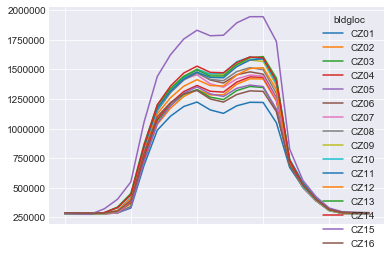

In [187]:
dfL.T.loc['PreNResSplitAC-45to-PENo'].T.plot()

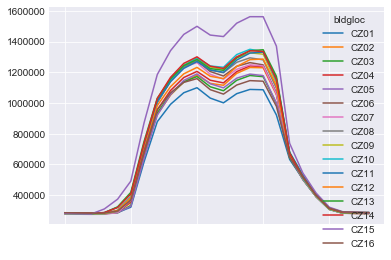

In [188]:
dfL.T.loc['MsrNResSplitAC-45to55-S17'].T.plot()

In [209]:
dfcz3 = dfL.T.reset_index().loc[dfL.T.reset_index()['bldgloc']=='CZ03'].set_index(['techid']).T[1:]

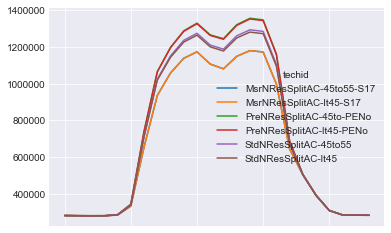

In [211]:
dfcz3.plot()

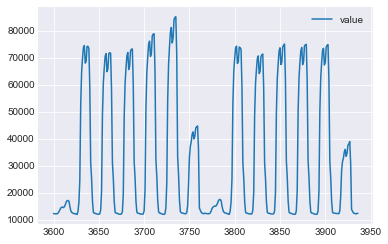

In [265]:
dfs[0].loc[150*24:164*24].plot()

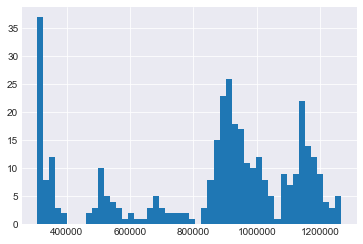

In [273]:
predf.sum(axis=1)['OfL'].hist(bins=50)

In [276]:
predf.sum(axis=1)['OfL'].loc[predf.sum(axis=1)['OfL']>1200000]

daynum
148    1231906.499
156    1219944.233
182    1206752.178
190    1251919.380
191    1266560.207
194    1249355.095
195    1202563.143
219    1236343.911
229    1243381.400
230    1209820.259
239    1214916.314
244    1264362.379
245    1266955.862
246    1206047.280
266    1209504.690
dtype: float64

In [228]:
for tech in dfhvac.techid.unique():
    dfhvac.groupby([ 'techid', 'bldgtype','daynum' ]).sum().loc[tech]

array(['MsrNResSplitAC-45to55-S17', 'MsrNResSplitAC-lt45-S17',
       'PreNResSplitAC-45to-PENo', 'PreNResSplitAC-lt45-PENo',
       'StdNResSplitAC-45to55', 'StdNResSplitAC-lt45'], dtype=object)

In [254]:
msr55 = dfhvac.groupby([  'techid', 'bldgtype','daynum'  ]).sum().loc['MsrNResSplitAC-45to55-S17']
msr45 = dfhvac.groupby([  'techid', 'bldgtype','daynum'  ]).sum().loc['MsrNResSplitAC-lt45-S17']
predf = dfhvac.groupby([  'techid', 'bldgtype','daynum'  ]).sum().loc['PreNResSplitAC-lt45-PENo']
std55 = dfhvac.groupby([  'techid', 'bldgtype','daynum' ]).sum().loc['StdNResSplitAC-45to55']
std45 = dfhvac.groupby([  'techid', 'bldgtype','daynum'  ]).sum().loc['StdNResSplitAC-lt45']
dfs = [msr55,msr45,predf,std55,std45]

In [255]:
for i in range(len(dfs)):
    dfs[i] = dfs[i].loc['OfL'].T.melt().reset_index().drop(['daynum', 'index'], axis=1)


In [259]:
savings = dfs[0]/dfs[2]


In [260]:
savings.to_csv('saving_shape_MsrNResSplitAC-45to55-S17.csv')

In [262]:
os.getcwd()

'C:\\Users\\jglasskatz\\MASControl3'